In [1]:
import numpy as np
import pandas as pd
import data_als
import data_prepro
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
train,test = data_prepro.loadData('datasets/data_tr_city.csv','datasets/data_ts_city.csv',trainYearRange1=2019,trainYearRange2=2020)

In [3]:
train = data_prepro.outlierDataToNan(train,low=True,high=True,thres=10.0)
train = data_prepro.fillprevValue(train)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 17519 to 35062
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             17544 non-null  object 
 1   구미 혁신도시배수지 유출유량 적산차  17544 non-null  float64
 2   year                 17544 non-null  int64  
 3   month                17544 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 685.3+ KB


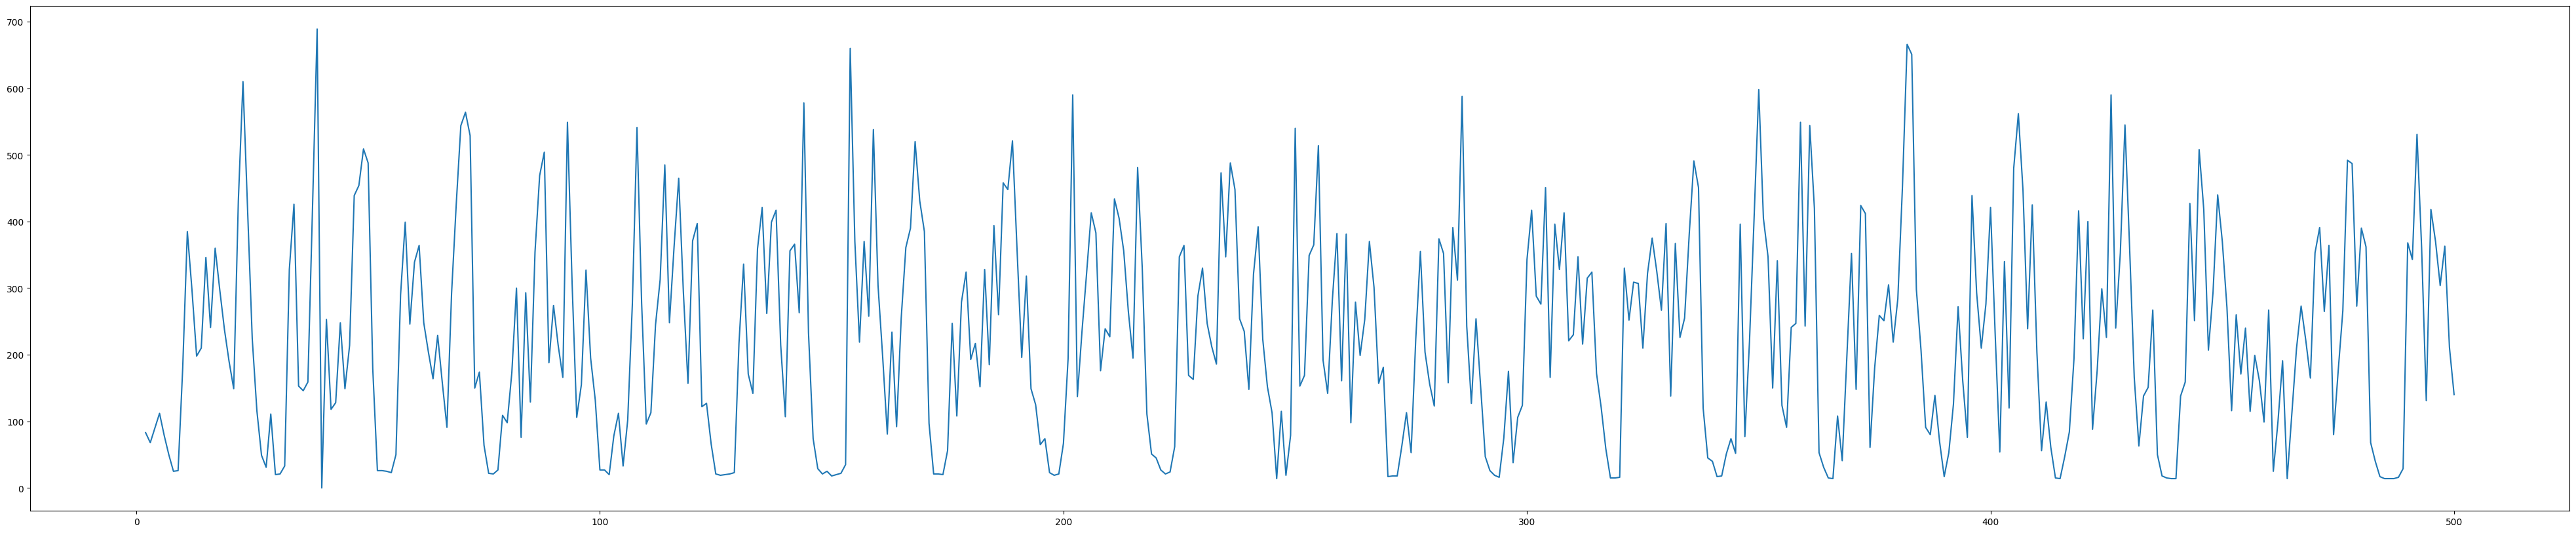

In [5]:
data_prepro.showValueGrap([train],1,500)

In [6]:
prepro = data_prepro.linearInterpolation(train)

In [7]:
prepro

,datetime,구미 혁신도시배수지 유출유량 적산차,year,month
17519,2019-01-01 00:00:00,114.0,2019,1
17520,2019-01-01 01:00:00,83.0,2019,1
17521,2019-01-01 02:00:00,68.0,2019,1
17522,2019-01-01 03:00:00,90.0,2019,1
17523,2019-01-01 04:00:00,112.0,2019,1
...,...,...,...,...
35058,2020-12-31 19:00:00,328.0,2020,12
35059,2020-12-31 20:00:00,347.0,2020,12
35060,2020-12-31 21:00:00,335.0,2020,12
35061,2020-12-31 22:00:00,141.0,2020,12


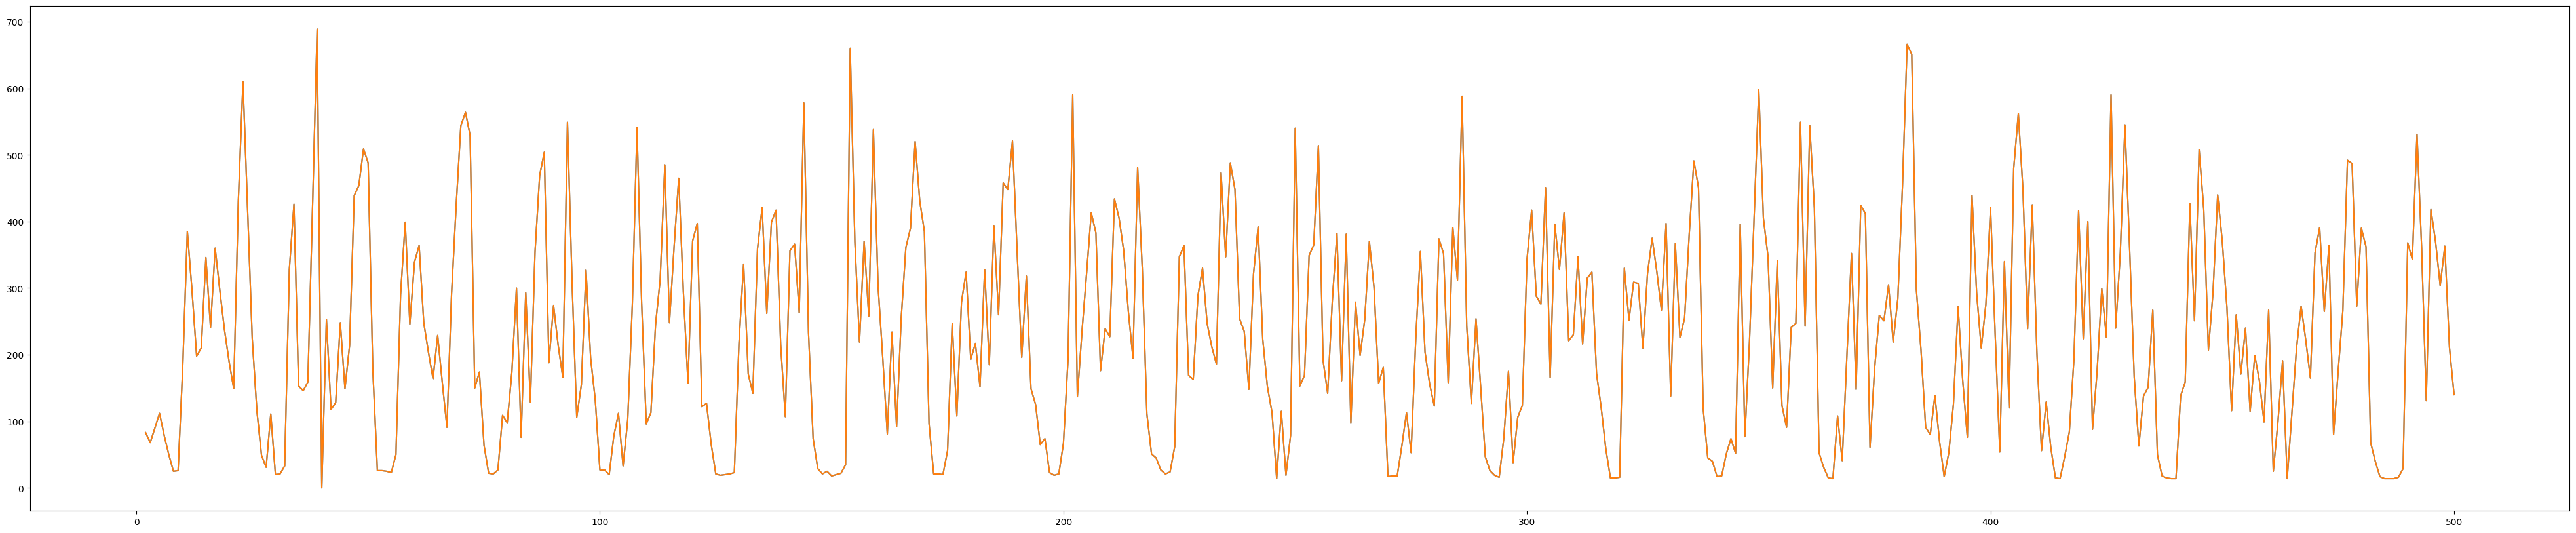

In [8]:
data_prepro.showValueGrap([train,prepro],1,500)
# data_prepro.showValueGrap(prepro,1,500)

In [9]:
Y = train['구미 혁신도시배수지 유출유량 적산차'].to_numpy()

In [10]:
Y

array([114.,  83.,  68., ..., 335., 141., 112.])

In [11]:
train['Y'] = ExponentialSmoothing(train['구미 혁신도시배수지 유출유량 적산차'],
                                 trend="add", # add || mul
                                 seasonal="add", # add || mul
                                 seasonal_periods=24 # we set 12. It represents that 12 step (month for our case) equals a seasonal period
                                 ).fit(smoothing_level=0.5, # alpha
                                        smoothing_trend=0.5, # beta
                                        smoothing_seasonal=0.5 # gamma
                                        ).fittedvalues

# https://www.statsmodels.org/devel/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
# https://www.kaggle.com/code/enesbaysan/applied-example-of-triple-exponential-smoothing

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 17519 to 35062
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             17544 non-null  object 
 1   구미 혁신도시배수지 유출유량 적산차  17544 non-null  float64
 2   year                 17544 non-null  int64  
 3   month                17544 non-null  int64  
 4   Y                    0 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 822.4+ KB
